In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyabc

h = pyabc.History("sqlite:///tumor2d_stoch_acc.db")
h_20191116 = pyabc.History("sqlite:///tumor2d_stoch_acc_20191116.db")
h_20191117 = pyabc.History("sqlite:///tumor2d_stoch_acc_20191117.db")
h_incorrect = pyabc.History("sqlite:///tumor2d_incorrect.db")
h_incorrect_20191116 = pyabc.History("sqlite:///tumor2d_incorrect_20191116.db")

limits = dict(log_division_rate=(-3, -1),
              log_division_depth=(1, 3),
              log_initial_spheroid_radius=(0, 1.2),
              log_initial_quiescent_cell_fraction=(-5, 0),
              log_ecm_production_rate=(-5, 0),
              log_ecm_degradation_rate=(-5, 0),
              log_ecm_division_threshold=(-5, 0))

refval = dict(log_division_rate=4.17e-2,
              log_initial_spheroid_radius=1.2e1,
              log_initial_quiescent_cell_fraction=7.5e-1,
              log_division_depth=100,
              log_ecm_production_rate=5e-3,
              log_ecm_degradation_rate=8e-4,
              log_ecm_division_threshold=1e-2,)
for key, val in refval.items():
    refval[key] = np.log10(val)

12
10


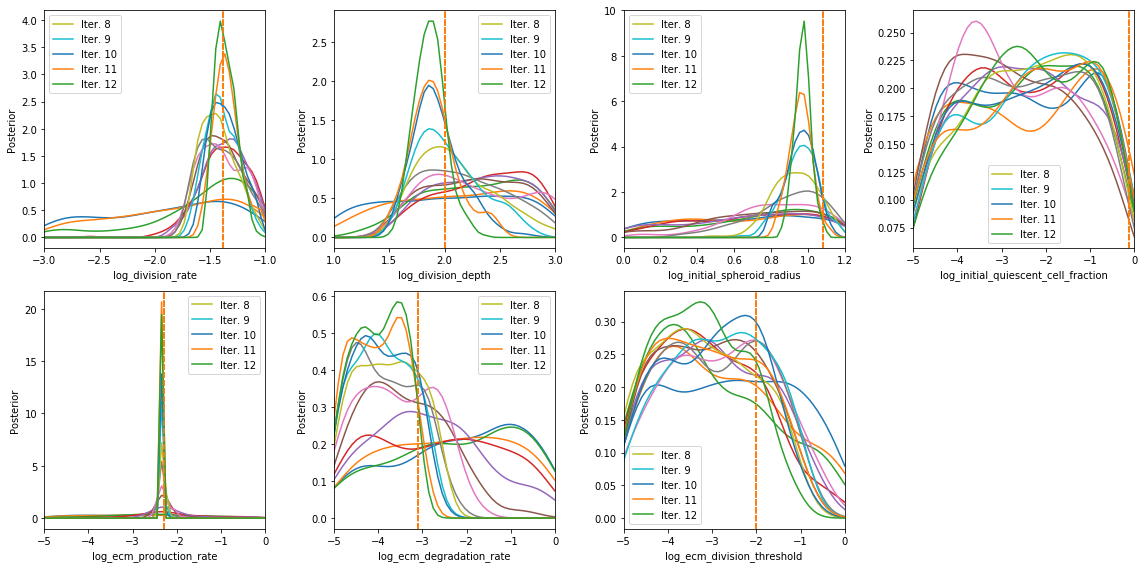

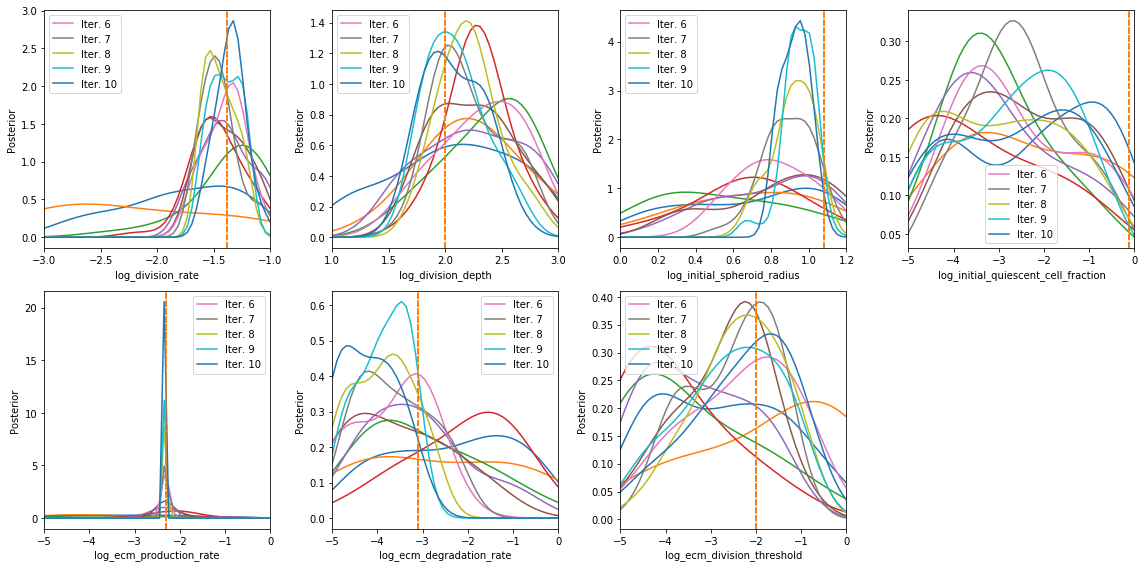

In [2]:
def plot(h):
    fig = plt.figure()
    print(h.max_t)

    for ip, p in enumerate(limits):
        ax = fig.add_subplot(2, 4, ip+1)
        for t in range(h.max_t + 1):
            pyabc.visualization.plot_kde_1d_highlevel(h, t=t, x=p, xmin=limits[p][0], xmax=limits[p][1],
                                                      ax=ax, label=(f"Iter. {t}" if t > h.max_t - 5 else ""), refval=refval)
        ax.legend()

    fig.set_size_inches((16, 8))
    fig.tight_layout()
    
plot(h)
#plot(h_20191117)
plot(h_20191116)

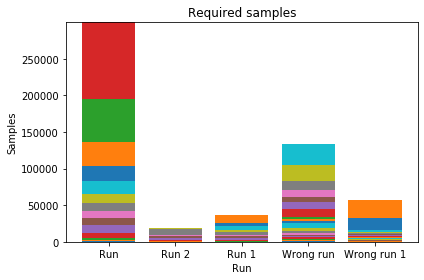

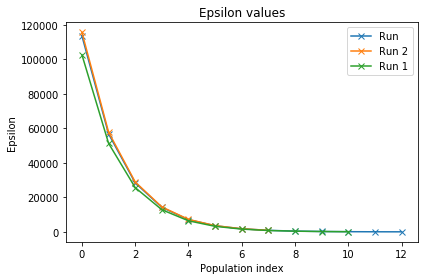

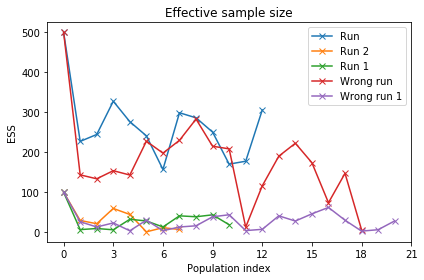

In [3]:
histories = [h, h_20191117, h_20191116, h_incorrect, h_incorrect_20191116]
labels = ["Run", "Run 2", "Run 1", "Wrong run", "Wrong run 1"]

pyabc.visualization.plot_sample_numbers(histories, labels)
pyabc.visualization.plot_epsilons([h, h_20191117, h_20191116], ["Run", "Run 2", "Run 1"])
pyabc.visualization.plot_effective_sample_sizes(histories, labels)

plt.show()

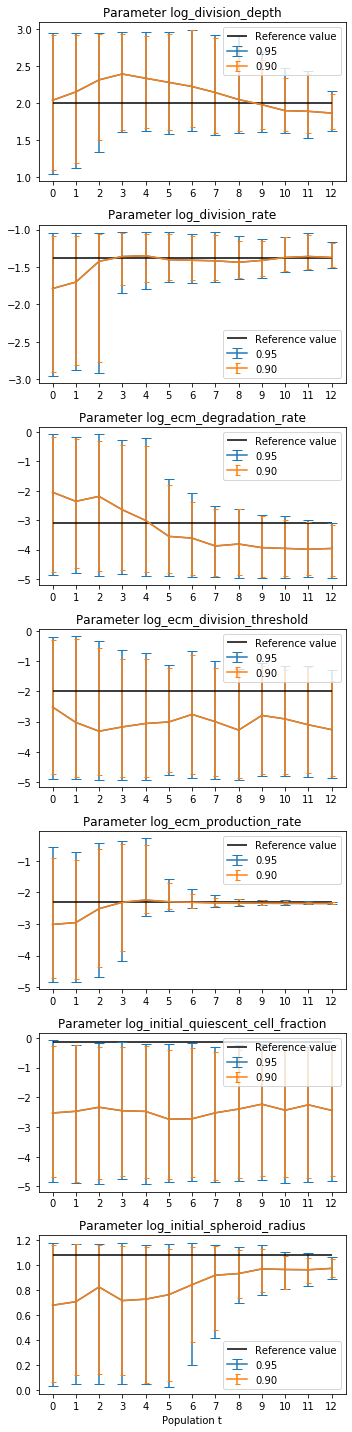

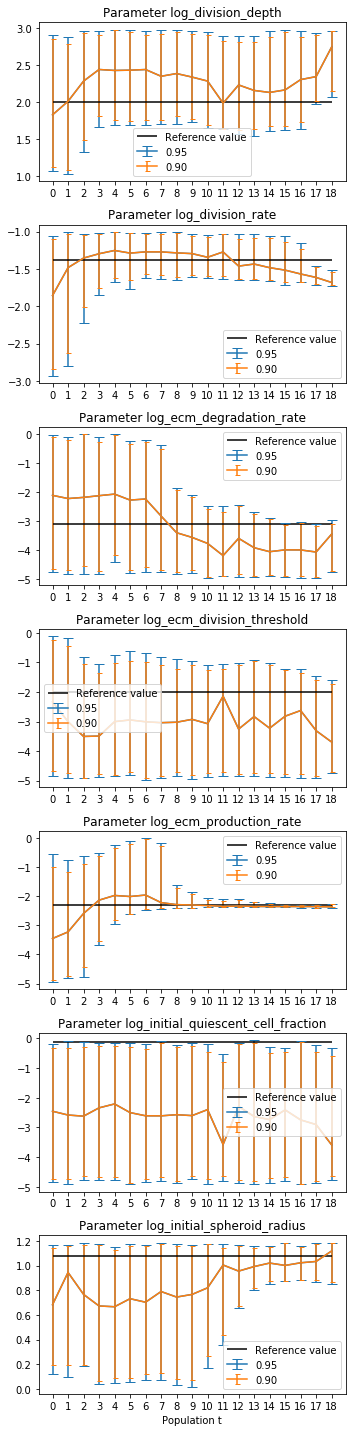

In [5]:
pyabc.visualization.plot_credible_intervals(h, size=(5, 20), refval=refval, levels=[0.9, 0.95])
pyabc.visualization.plot_credible_intervals(h_incorrect, size=(5, 20), refval=refval, levels=[0.9, 0.95])
plt.show()

18


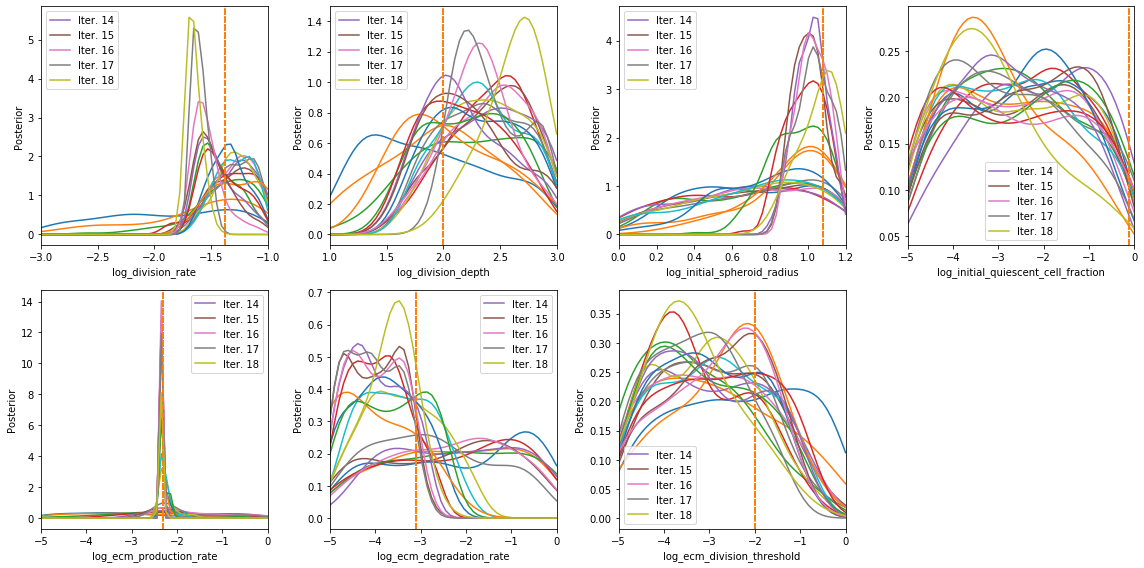

In [6]:
fig = plt.figure()
print(h_incorrect.max_t)

for ip, p in enumerate(limits):
    ax = fig.add_subplot(2, 4, ip+1)
    for t in range(h_incorrect.max_t + 1):
        pyabc.visualization.plot_kde_1d_highlevel(h_incorrect, t=t, x=p, xmin=limits[p][0], xmax=limits[p][1],
                                                  ax=ax, refval=refval,
                                                  label=(f"Iter. {t}" if t > h_incorrect.max_t - 5 else ""))
    ax.legend()

fig.set_size_inches((16, 8))
fig.tight_layout()


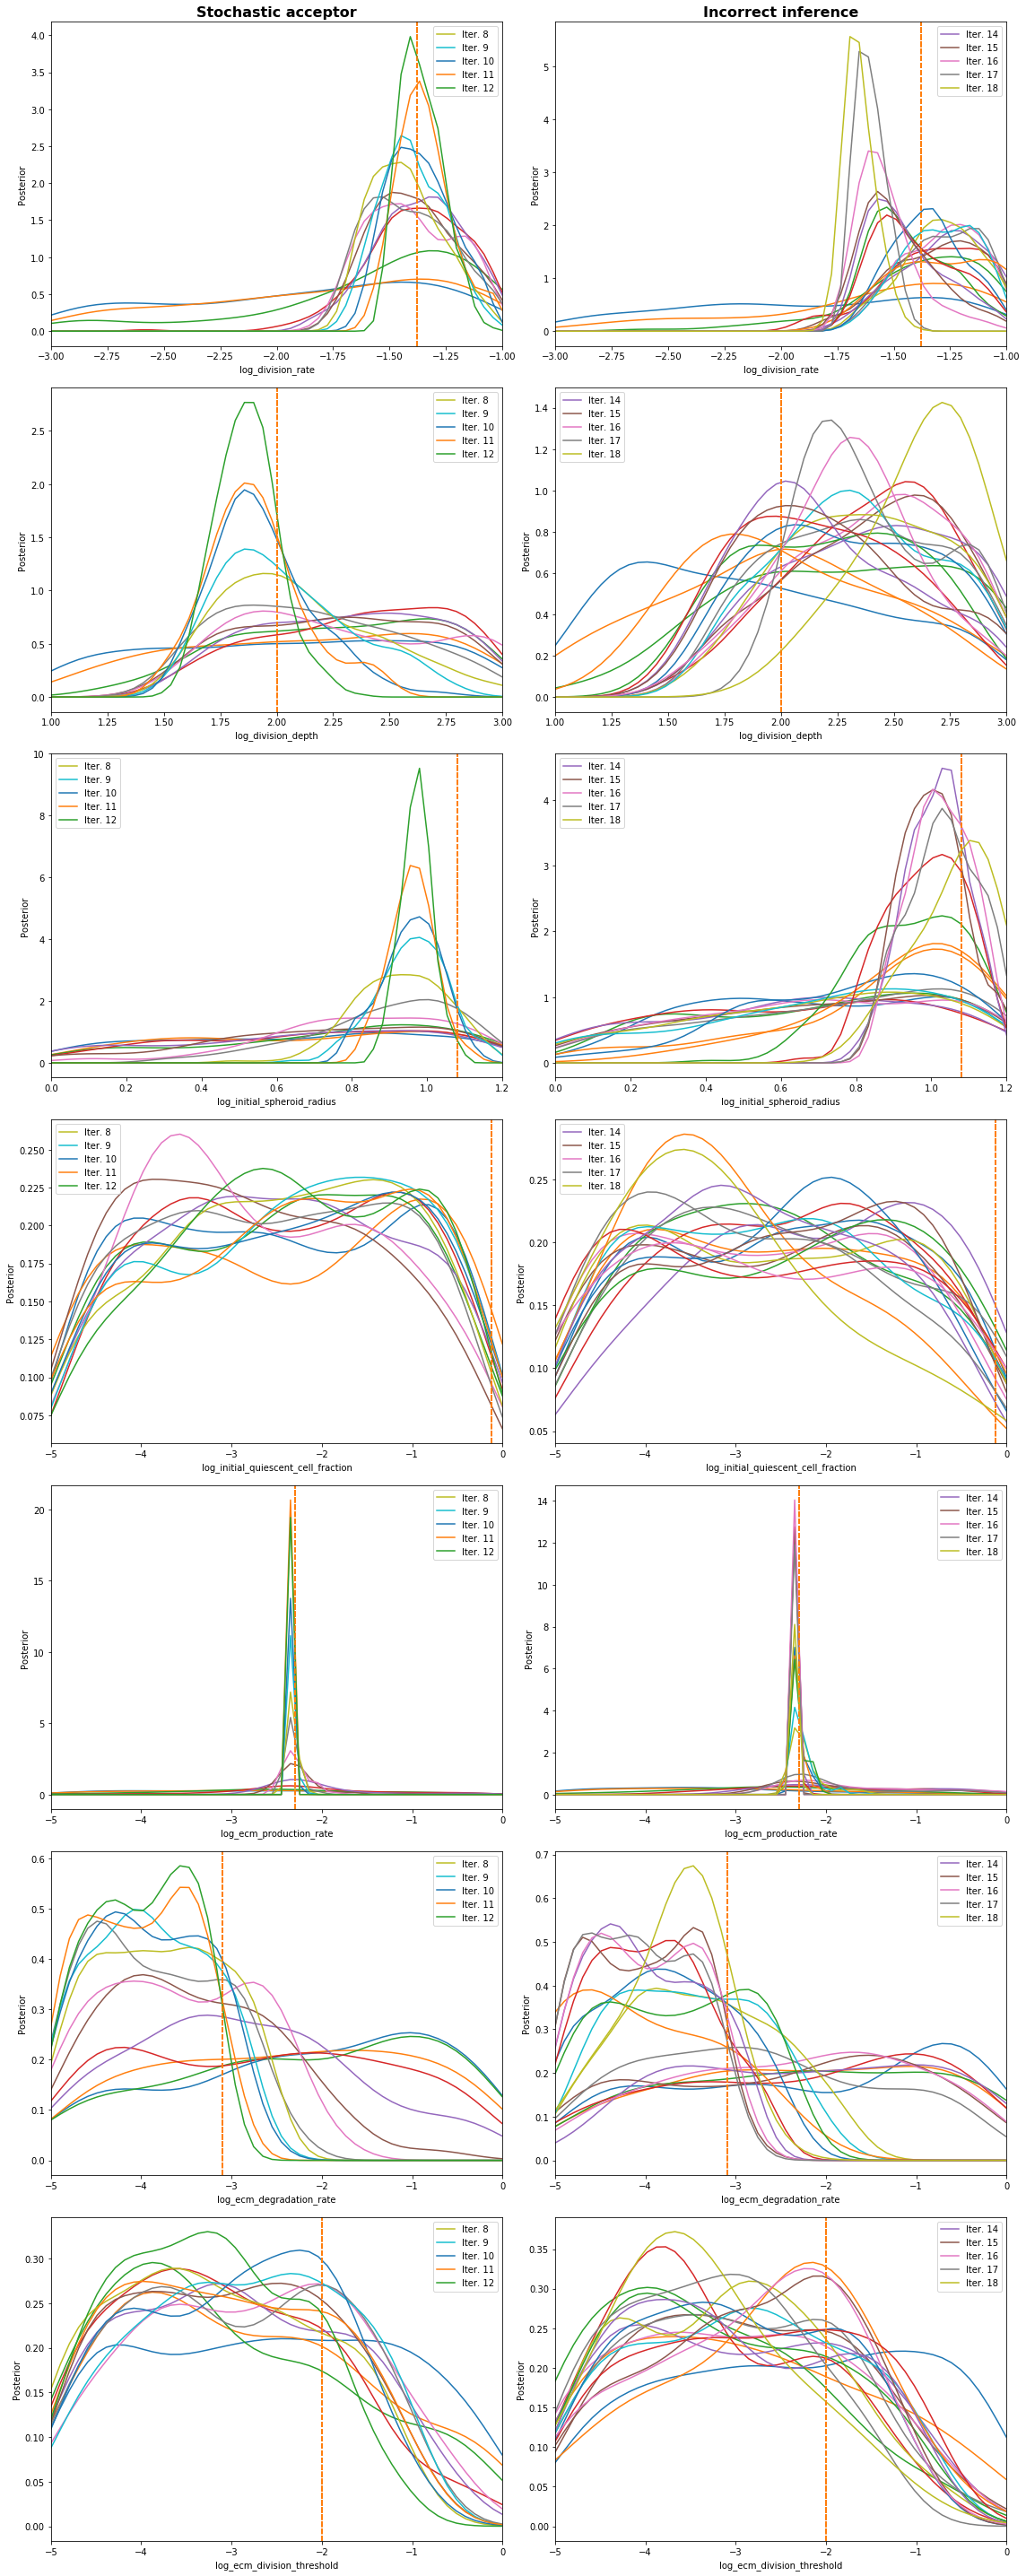

In [7]:
fig = plt.figure()

for ip, p in enumerate(limits):
    ax = fig.add_subplot(7, 2, 2*ip+1)
    for t in range(h.max_t + 1):
        pyabc.visualization.plot_kde_1d_highlevel(h, t=t, x=p, xmin=limits[p][0], xmax=limits[p][1],
                                                  ax=ax, label=(f"Iter. {t}" if t > h.max_t - 5 else ""), refval=refval)
    ax.legend()
    if ip==0:
        ax.set_title("Stochastic acceptor", fontsize=16, fontweight="bold")
    ax = fig.add_subplot(7, 2, 2*ip+2)
    for t in range(h_incorrect.max_t + 1):
        pyabc.visualization.plot_kde_1d_highlevel(h_incorrect, t=t, x=p, xmin=limits[p][0], xmax=limits[p][1],
                                                  ax=ax, refval=refval,
                                                  label=(f"Iter. {t}" if t > h_incorrect.max_t - 5 else ""))
    if ip==0:
        ax.set_title("Incorrect inference", fontsize=16, fontweight="bold")
    ax.legend()

fig.set_size_inches((16, 40))
fig.tight_layout()